<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
from error_analysis_funs import *

methods = ['pencil']#['qeep', 'qeep-sparse', 'pencil']

phases = [4.77144,    2.82579877, 4.88021636, 0.41070768, 3.06350016]
num_phases = len(phases)

final_error = 0.1
confidence_alpha = 0.8
confidence_beta = 0.1
deltas = [0.3]

cutoff = 1/ num_phases / 3

amplitudes = np.ones(num_phases)/num_phases

estimates = {}
costs = {}
for method in methods:
    estimates[method] = {}
    costs[method] = {}

for method in methods:
    for delta in deltas:
        
        print(method, delta)
        e,c  = multiorder_estimation(method,
                             phases, amplitudes,
                             delta, confidence_alpha, confidence_beta,
                             final_error, cutoff)
        estimates[method][delta] = e
        costs[method][delta] = c

pencil 0.3
Couldnt find good beta, exiting


C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:145: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:145: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:145: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:145: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:145: UserWarning: New multiplier is between 1 and 2, this may be inefficient.
  warnings.warn('New multiplier is between 1 and 2, this '
C:\Users\Repair\Documents\new_qpe_a

<>:9: DeprecationWarning: invalid escape sequence \d
<ipython-input-3-8608d93e8ac3>:9: DeprecationWarning: invalid escape sequence \d
  plt.title(f'$\delta = {delta}$')


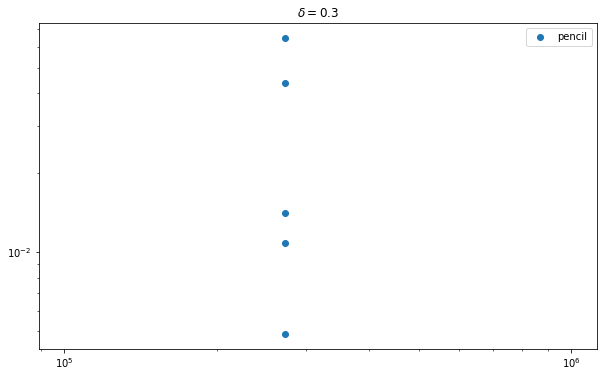

In [3]:
plt.figure(figsize = (10, 6))
for i,delta in enumerate(deltas):
    plt.subplot(1,len(deltas),i+1)
    for method in methods:
        estimation_errors = get_estimation_errors(estimates[method][delta], phases)
        plt.scatter([c for c_vec in costs[method][delta] for c in c_vec ], [e for e_vec in estimation_errors for e in e_vec ], label = method)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'$\delta = {delta}$')
    plt.legend()
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \d
<>:8: DeprecationWarning: invalid escape sequence \d
<ipython-input-4-bbb41a0ebcd7>:8: DeprecationWarning: invalid escape sequence \d
  plt.title(method+f', $\delta$ = {delta}')


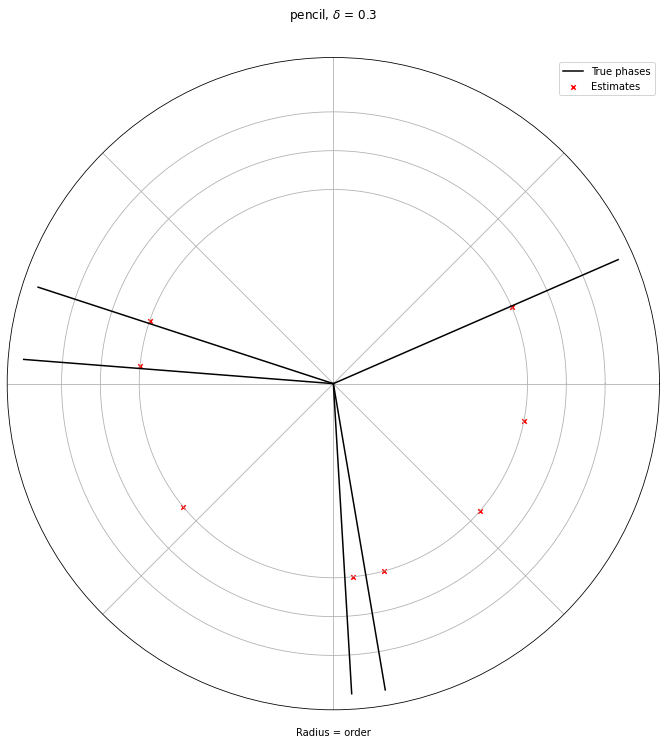

In [4]:
plt.figure(figsize = (16, 12))
i = 0
for delta in deltas:
    for method in methods:
        i+=1
        plt.subplot(len(deltas), len(methods), i, projection='polar')
        plot_phase_estimates(phases, estimates[method][delta], np.ceil(np.log2(2*delta/final_error)).astype('int'))
        plt.title(method+f', $\delta$ = {delta}')
plt.show()